__Forecasting Stock prices__

Using Holt and Holt winter models

In [1]:
from statsmodels.tsa.api import Holt, ExponentialSmoothing
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from sklearn import metrics

In [2]:
# reading from csv file
data1 = pd.read_csv(r"stock_info\infosys.csv")
data2 = pd.read_csv(r"stock_info\HEROMOTOCO.NS.csv")
data3 = pd.read_csv(r"stock_info\tatasteel.csv")

In [3]:
break_point1 = 450
train1 = data1.iloc[:break_point1].copy()
test1 = data1.iloc[break_point1:].copy()

break_point2 = 450
train2 = data2.iloc[:break_point2].copy()
test2 = data2.iloc[break_point2:].copy()

break_point3 = 450
train3 = data3.iloc[:break_point3].copy()
test3 = data3.iloc[break_point3:].copy()

In [4]:
model1 = Holt(np.asarray(train1['Adj Close'])).fit(smoothing_level = 0.3, smoothing_trend = 0.1)
test1['predictions'] = list(model1.forecast(len(test1)))

model2 = Holt(np.asarray(train2['Adj Close'])).fit(smoothing_level = 0.3, smoothing_trend = 0.1)
test2['predictions'] = list(model2.forecast(len(test2)))

model3 = Holt(np.asarray(train3['Adj Close'])).fit(smoothing_level = 0.3, smoothing_trend = 0.1)
test3['predictions'] = list(model3.forecast(len(test3)))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


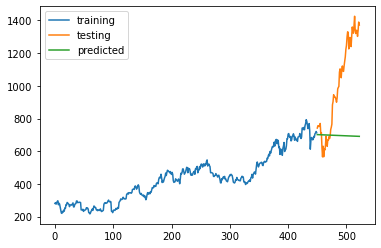

RMS error 406.69828261550805


In [5]:
# plotting outputs from model1
plt.figure()
plt.plot(train1['Adj Close'])
plt.plot(test1['Adj Close'])
plt.plot(test1['predictions'])
plt.legend(['training', 'testing', 'predicted'])
plt.show()

# rms error
print("RMS error", math.sqrt(metrics.mean_squared_error(test1['Adj Close'], test1['predictions'])))

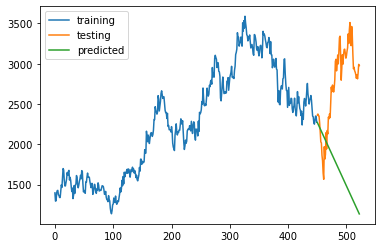

RMS error 1292.4906082947732


In [6]:
# plotting outputs from model2
plt.figure()
plt.plot(train2['Adj Close'])
plt.plot(test2['Adj Close'])
plt.plot(test2['predictions'])
plt.legend(['training', 'testing', 'predicted'])
plt.show()

# rms error
print("RMS error", math.sqrt(metrics.mean_squared_error(test2['Adj Close'], test2['predictions'])))

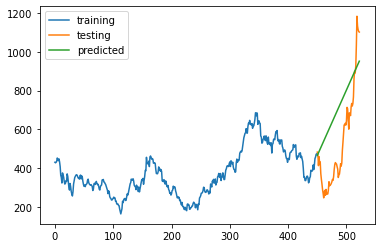

RMS error 230.7821901566578


In [7]:
# plotting outputs from model3
plt.figure()
plt.plot(train3['Adj Close'])
plt.plot(test3['Adj Close'])
plt.plot(test3['predictions'])
plt.legend(['training', 'testing', 'predicted'])
plt.show()

# rms error
print("RMS error", math.sqrt(metrics.mean_squared_error(test3['Adj Close'], test3['predictions'])))

In [8]:
hw_model1 = ExponentialSmoothing(np.asarray(train1['Adj Close']), seasonal_periods = 100, trend = 'add', seasonal = 'mul',).fit()
test1['predictions_hw'] = list(hw_model1.forecast(len(test1)))

hw_model2 = ExponentialSmoothing(np.asarray(train2['Adj Close']), seasonal_periods = 100, trend = 'add', seasonal = 'mul',).fit()
test2['predictions_hw'] = list(hw_model2.forecast(len(test2)))

hw_model3 = ExponentialSmoothing(np.asarray(train3['Adj Close']), seasonal_periods = 100, trend = 'add', seasonal = 'mul',).fit()
test3['predictions_hw'] = list(hw_model3.forecast(len(test3)))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


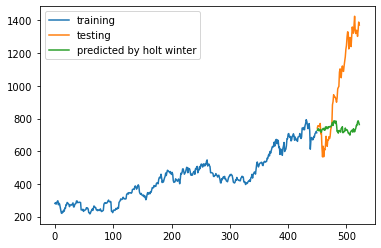

RMS error 376.68932733561735


In [9]:
# plotting outputs from holt winter model1
plt.figure()
plt.plot(train1['Adj Close'])
plt.plot(test1['Adj Close'])
plt.plot(test1['predictions_hw'])
plt.legend(['training', 'testing', 'predicted by holt winter'])
plt.show()

# rms error
print("RMS error", math.sqrt(metrics.mean_squared_error(test1['Adj Close'], test1['predictions_hw'])))

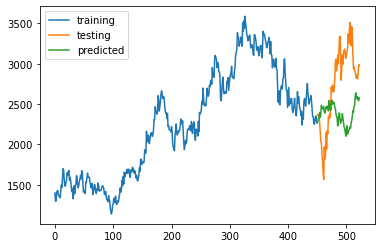

RMS error 661.578560599535


In [10]:
# plotting outputs from holt winter model2
plt.figure()
plt.plot(train2['Adj Close'])
plt.plot(test2['Adj Close'])
plt.plot(test2['predictions_hw'])
plt.legend(['training', 'testing', 'predicted'])
plt.show()

# rms error
print("RMS error", math.sqrt(metrics.mean_squared_error(test2['Adj Close'], test2['predictions_hw'])))

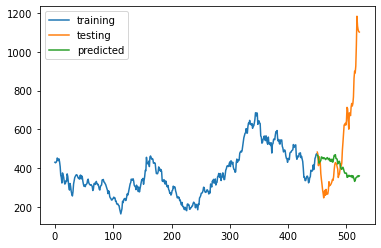

RMS error 308.81175946353085


In [11]:
# plotting outputs from holt winter model3
plt.figure()
plt.plot(train3['Adj Close'])
plt.plot(test3['Adj Close'])
plt.plot(test3['predictions_hw'])
plt.legend(['training', 'testing', 'predicted'])
plt.show()

# rms error
print("RMS error", math.sqrt(metrics.mean_squared_error(test3['Adj Close'], test3['predictions_hw'])))

__Conclusion:__

Holt model takes trend only into account while forecasting and Holt winter model takes trend and seasonality into account. But still, both are inadequate to predict stock prices because of too much randomness present in stock prices. These models are only good when the changes in time series data are consistant.